# Decision Tree Model for Rothko Art

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import graphviz 
import pydotplus
import sklearn
import pickle

## Load art data

In [2]:
data = pd.DataFrame.from_csv('../../data/data.csv')

/Users/acanois/anaconda2/envs/lab/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


In [3]:
data = data[['year','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]

In [4]:
# Bin the data into appropriate art timelines for the artist
bins = [1935, 1940, 1947, 1950, 1968, 1971]
data['year_bin']=pd.cut(data['year'], bins)

In [5]:
data.head()

,year,shannon_entropy,mean_color_r,luminance,contrast,contour,year_bin
0,1946,6.768127,195.046332,181.738624,0.827169,0.000056,"(1940, 1947]"
1,1953,6.937948,228.983463,161.723046,0.587802,0.000000,"(1950, 1968]"
2,1944,6.519651,217.905564,214.564295,0.853499,0.003758,"(1940, 1947]"
3,1951,6.451747,191.229599,184.080065,0.706196,0.000063,"(1950, 1968]"
4,1949,5.738259,230.154804,224.799111,0.658131,0.000000,"(1947, 1950]"


## Create the model

In [6]:
# Create the Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

In [7]:
# Split the columns to separate the features from the result/target data
features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['year_bin'].astype(str)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)


In [8]:
# Train the model
clf.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

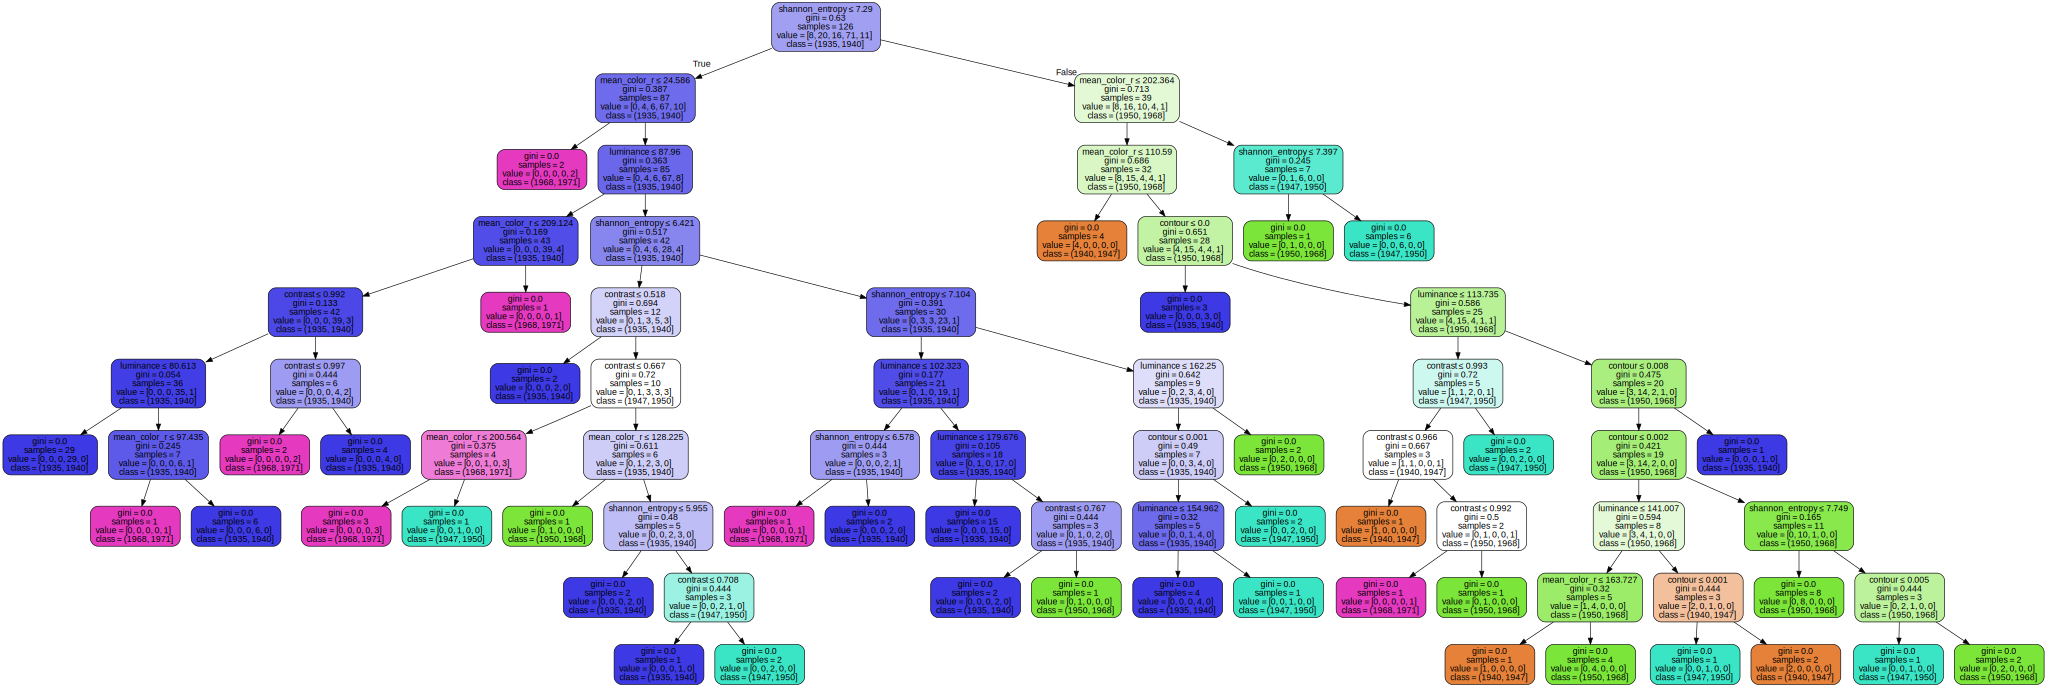

In [9]:
# Plot the Decicion Tree
dot_data = tree.export_graphviz(
   clf, out_file=None,
   feature_names=['shannon_entropy','mean_color_r','luminance','contrast', 'contour'],  
   class_names=list(target.unique()),  
   filled=True, rounded=True,  
   special_characters=True)  

# Save the graphic representation of the tree into an image file
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("RothkoTree.png")

# Display the tree
graph = graphviz.Source(dot_data)  
graph

In [10]:
# Score the model on the training data
clf.score(features_train, target_train)

1.0

In [11]:
# Predict the bins for the test data
p = clf.predict(features_test)
for i in range(0, len(p)):
    print(p[i] == target_test.tolist()[i], p[i], target_test.tolist()[i])

True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1947, 1950] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
False (1947, 1950] (1950, 1968]
True (1950, 1968] (1950, 1968]
False (1935, 1940] (1940, 1947]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1940, 1947] (1940, 1947]
True (1947, 1950] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
False (1950, 1968] (1935, 1940]
False (1940, 1947] (1935, 1940]
False (1947, 1950] (1940, 1947]
True (1950, 1968] (1950, 1968]
True (1947, 1950] (1947, 1950]
True (1950, 1968] (1950, 1968]
False (1940, 1947] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1968, 1971] (1968, 1971]
True (1950, 1968] (1950, 1968]
False (1950, 1968] (1947, 1950]
True (1950, 1968] (1950, 1968]
False (1947, 1950] (1940, 1947]


In [12]:
# Score the model on the test data
clf.score(features_test, target_test)

0.7619047619047619

In [13]:
# Check the accuracy score for the predicted values
sklearn.metrics.accuracy_score(target_test,p)

0.7619047619047619

In [14]:
# Save the model to a file
filename = "RothkoDecisionTree.pkl"
pickle.dump(clf, open(filename, "wb"))

In [15]:
# load the model from disk
loaded_clf = pickle.load(open(filename, "rb"))

In [16]:
loaded_clf.score(features_test, target_test)

0.7619047619047619